In [ ]:
# MACHINE LEARNING WITH SCIKIT-LEARN 

In [ ]:
# importing required packages and modules 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

In [32]:
# load the iris data set 
iris = datasets.load_iris()

In [33]:
#  converting faetures - x and  target - y to a pandas dataframe 
x = pd.DataFrame(data=iris.data, columns=iris.feature_names)
y = pd.Series(data=iris.target, name='target')

In [34]:
# map the numeric target values to their actual species names
species_name = dict(enumerate(iris.target_names))
y_named = y.map(species_name)

In [35]:
# understanding the data - first five rows
print("First 5 rows of iris dataset:")
print(pd.concat([x, y_named], axis=1).head())
print("\nData Summary:")
print(pd.concat([x, y_named], axis=1).info())   #from the summary we can see there are no missing values 150 entries and 5 columns
print("\nStatistical Summary:")
print(pd.concat([x, y_named], axis=1).describe())

First 5 rows of iris dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target     

In [36]:
# encode the target variable - convert species names to numeric labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_named)

# show encoded labels
print("\nEncoded target labels:")
for species, code in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{species}: {code}")


Encoded target labels:
setosa: 0
versicolor: 1
virginica: 2


In [37]:
# splitting the data into training and testing sets. test size is 20% of the total data
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

print(f"\nTraining set size: {x_train.shape[0]}, Test samples: {x_test.shape[0]}")


Training set size: 120, Test samples: 30


In [38]:
# training the Decision Tree Classifier
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(x_train, y_train)
print("\nModel training completed.")


Model training completed.


In [39]:
# make predictions on the test set
y_pred = classifier.predict(x_test)

In [40]:
# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(f"\nModel Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)




Model Evaluation Metrics:
Accuracy: 0.9333
Precision: 0.9333
Recall: 0.9333

Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



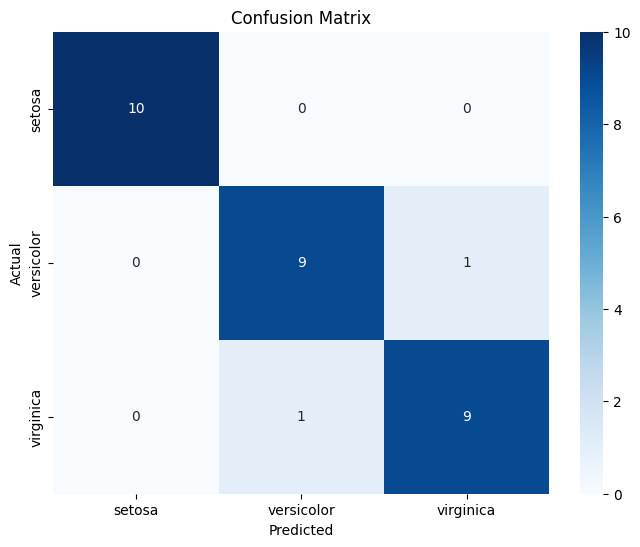

In [41]:
# visualizing the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

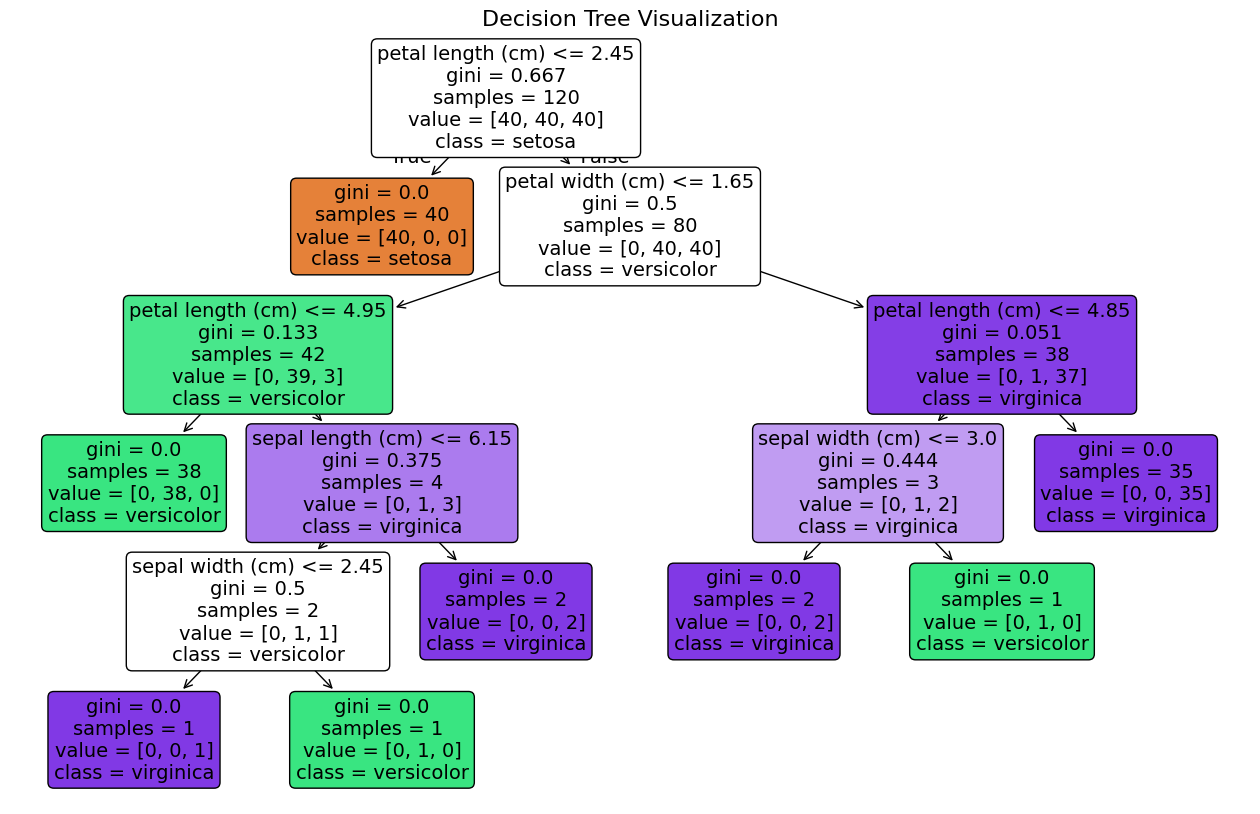

In [42]:
# decision tree visualization
from sklearn.tree import plot_tree
plt.figure(figsize=(16, 10))
plot_tree(classifier, 
        feature_names=iris.feature_names, 
        class_names=iris.target_names, 
        filled=True,
        rounded=True,
        fontsize=14
)
plt.title("Decision Tree Visualization", fontsize=16)
plt.show()

In [44]:
# DEEP LEARNING WITH PYTORCH 

In [146]:
# importing necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

In [147]:
# check if GPU is available 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Using device: {device}')


Using device: cpu


In [148]:
# load and preprocess the dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Download and load the training and test data
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# create data loaders
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)

print (f"Training samples: {len(train_dataset)}, Test samples: {len(test_dataset)}")

Training samples: 60000, Test samples: 10000


In [155]:
# define the convolutional neural network CNN architecture
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.fc1 = nn.Linear(32*7*7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 32*7*7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
# initialize the model
model = CNN().to(device)
print (model)

CNN(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=1568, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [156]:
# define loss function and optimizer
criterion = nn.CrossEntropyLoss()# check shapes of feature after convolutions
optimizer = optim.Adam(model.parameters(), lr=0.0005)

In [157]:
# training the model
num_epochs = 5
train_losses = []
train_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # epochs metrics
    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = 100 * correct / total
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%')

print ('Training complete.')

Epoch [1/5], Loss: 0.1977, Accuracy: 94.17%
Epoch [2/5], Loss: 0.0572, Accuracy: 98.25%
Epoch [3/5], Loss: 0.0409, Accuracy: 98.75%
Epoch [4/5], Loss: 0.0300, Accuracy: 99.08%
Epoch [5/5], Loss: 0.0234, Accuracy: 99.23%
Training complete.


In [158]:
# evaluating the model
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Test Accuracy: {accuracy:.2f}%')

Test Accuracy: 99.03%


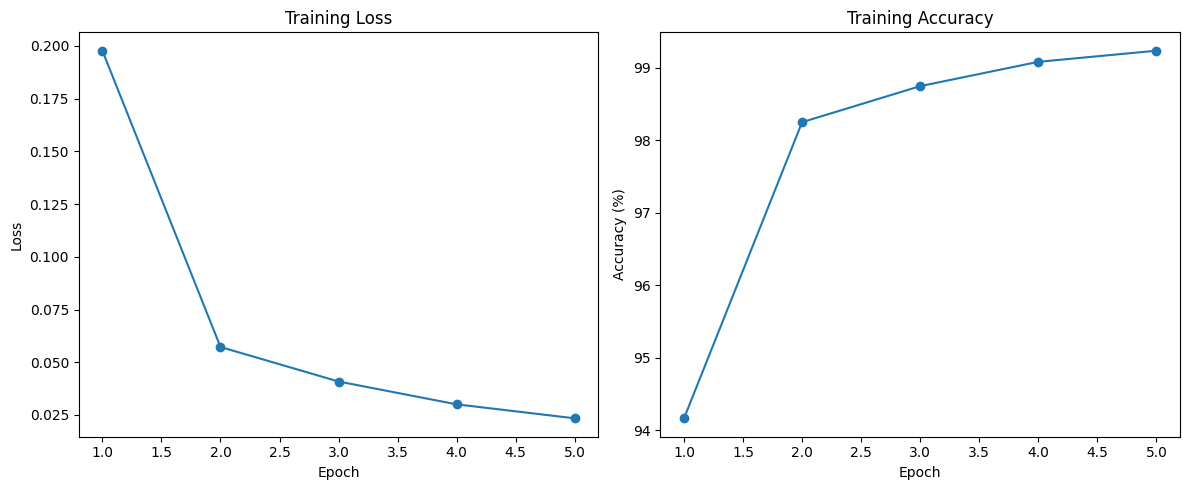

In [159]:
# visualize loss and accuracy 
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, marker='o')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, marker='o')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')

plt.tight_layout()
plt.show()


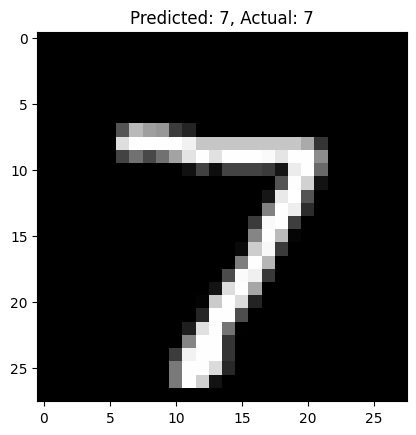

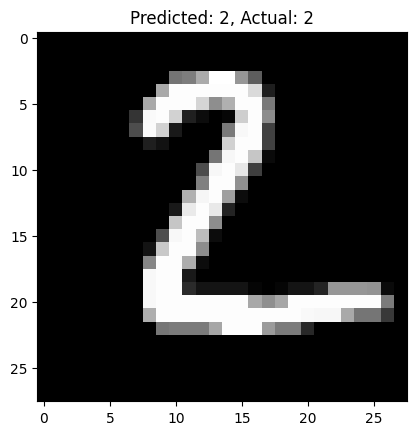

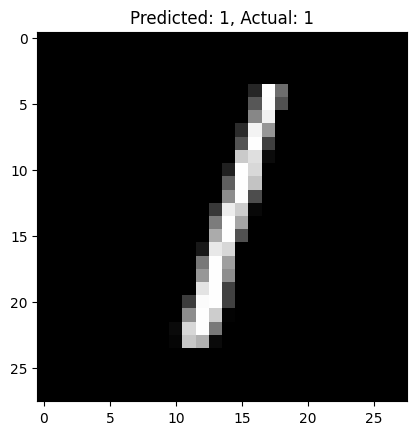

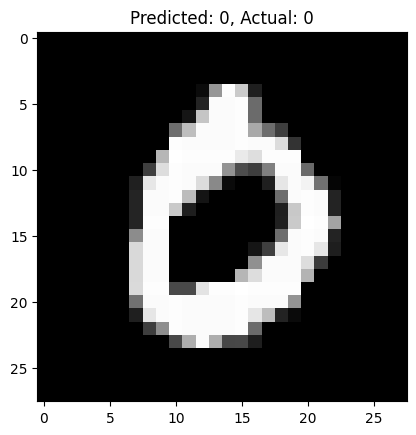

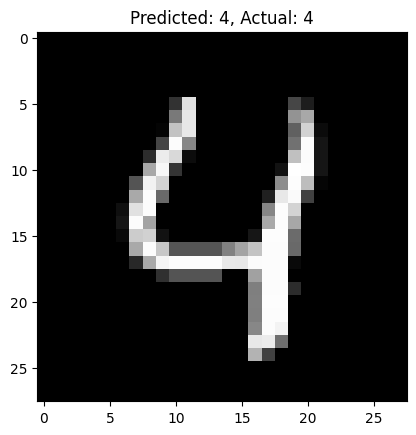

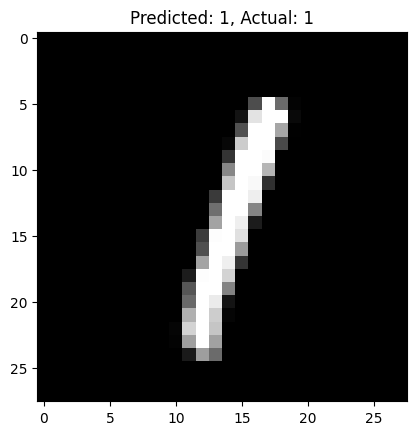

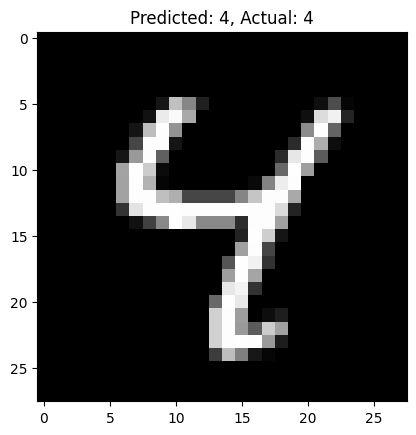

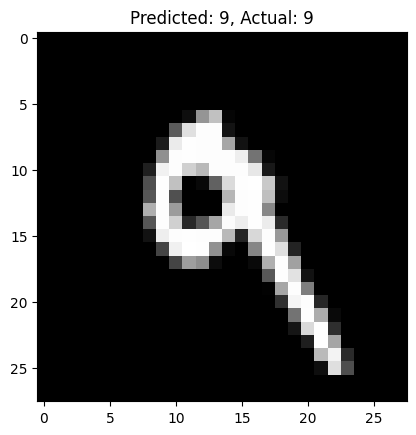

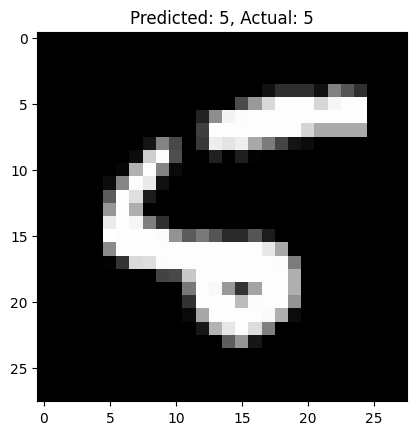

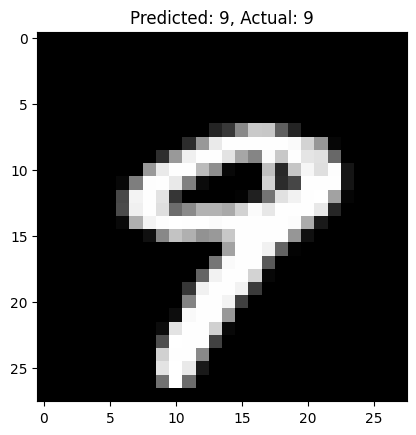

In [161]:
# show predictions on 5 samples
model.eval()
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

with torch.no_grad():
    example_data, example_targets = example_data.to(device), example_targets.to(device)
    output = model(example_data)
    _, preds = torch.max(output, 1)
    for i in range(10):
        plt.imshow(example_data[i].cpu().squeeze(), cmap='gray')
        plt.title(f'Predicted: {preds[i].item()}, Actual: {example_targets[i].item()}')
        plt.show()

In [162]:
# Save the trained model
torch.save(model.state_dict(), 'cnn_mnist_model.pth')
print('Model saved as cnn_mnist_model.pth')

Model saved as cnn_mnist_model.pth


In [ ]:
# NLP with spaCy

In [163]:
# import libraries 
import spacy
import random
import pandas as pd

In [165]:
# load the spacy model
nlp = spacy.load("en_core_web_sm")

In [172]:
# load dataset kagggle amazon reviews 
file_path = "train.ft.txt"

# read first 100000 lines of the dataset
sample_size = 100000
data = []

with open(file_path, "r", encoding="utf-8") as f:
    for i, line in enumerate (f):
        if i >= sample_size:
            break
        parts = line.strip().split(" ", 1)
        if len(parts) == 2:
            label, review = parts
            data.append((label.replace("__label__", ""), review))

In [173]:
# create a dataframe
df = pd.DataFrame(data, columns=["label", "review"])
print (f"Loaded {len(df)} records successfully.")
print(df.head())

Loaded 100000 records successfully.
  label                                             review
0     2  Stuning even for the non-gamer: This sound tra...
1     2  The best soundtrack ever to anything.: I'm rea...
2     2  Amazing!: This soundtrack is my favorite music...
3     2  Excellent Soundtrack: I truly like this soundt...
4     2  Remember, Pull Your Jaw Off The Floor After He...


In [174]:
# function to perform NLP tasks - rule based sentiment analyzer
def analyze_sentiment(text):
    positive_words = ["good", "great", "excellent", "amazing", "fantastic", "love", "wonderful", "best", "perfect", "satisfied", "happy", "positive", "enjoyed", "pleased"]
    negative_words = ["bad", "terrible", "awful", "worst", "hate", "disappointing", "poor", "negative", "sad", "angry", "frustrated", "unsatisfied", "boring", "dull", "annoying", "problem"]

    text_lower = text.lower()
    score = 0
    for word in positive_words:
        if word in text_lower:
            score += 1
    for word in negative_words:
        if word in text_lower:
            score -= 1

    if score > 0:
        return "positive"
    elif score < 0:
        return "negative"
    else:
        return "neutral"

In [176]:
# apply sentiment analysis on the reviews
sample_reviews = df.sample(1000, random_state=42).reset_index(drop=True)

for i, review in enumerate(sample_reviews["review"], 1):
    doc = nlp(review)
    entities = [(ent.text, ent.label_) for ent in doc.ents if ent.label_ in ["ORG","PRODUCT"]]
    sentiment = analyze_sentiment(review)

    print (f"Review {i}: {review}")
    print (f"  Sentiment: {sentiment}")
    if entities:
        print (f"  Entities: {entities}")
    else:
        print (f"  Entities: None") 
    print ("-"*80)
    

Review 1: I love reading Patricia Cornwell book's: I have read all of Patricia Cornwell's books. I was not happy with Benton dying, but I do like Talley. I hope he will have a bigger part and their relationship go further in her next book. I could not put the book down until I finished reading it. I loved it.
  Sentiment: positive
  Entities: None
--------------------------------------------------------------------------------
Review 2: Great African Sampler: Lively and danceable, fun African music: Soukous (Zaire/Ivory Coast), Juju (Nigeria), Highlife (Ghana). Some tunes are longer jams.But look for the Sterns pressing that includes two extra tracks, filling the CD with 79 minutes of music. That edition has a different cover: yellow border, with a graphic of two African dancers on a red background.This CD is volume 1. There is also a second volume, available separately, also from Sterns.
  Sentiment: positive
  Entities: [('Zaire/Ivory Coast', 'ORG'), ('Sterns', 'ORG'), ('Sterns', 'OR